<a href="https://colab.research.google.com/github/Demisha-Govender/700Project/blob/main/ForExperimentPurpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#219014298
#Demisha Govender
'''This notebook contains code for the different experiments runned in order to determine a suitable imputation technique to use and a suitable percentage
of missing data to have in the dataset.'''
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import statsmodels.api as sm

In [ ]:
df1 = pd.read_csv("/home/household_power_consumption.txt",delimiter=";")
df1["datetime"] = df1[["Date","Time"]].apply(lambda x: x[0]+" "+x[1],axis=1)
df1["datetime"] = pd.to_datetime(df1["datetime"], infer_datetime_format=True)
df1 = df1.drop(["Date","Time"],axis=1)
df1.index = df1["datetime"]
df1 = df1.drop("datetime",axis=1)
df1 = df1.apply(lambda x: pd.to_numeric(x, errors='coerce'))
print(df1)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2007-01-08 01:52:00                1.344                  0.106   239.24   
2007-01-08 01:53:00                1.286                  0.000   239.32   
2007-01-08 01:54:00                1.278                  0.000   240.35   
2007-01-08 01:55:00                1.294                  0.000   240.06   
2007-01-08 01:56:00                1.282                  0.000   239.89   

           

In [ ]:
#Different Percentage of missing values
gapminder_NaN10 = df1.mask(np.random.random(df1.shape)<0.014)
gapminder_NaN20 = df1.mask(np.random.random(df1.shape)<0.02857)
gapminder_NaN30 = df1.mask(np.random.random(df1.shape)<0.04286)
gapminder_NaN40 = df1.mask(np.random.random(df1.shape)<0.05714)
gapminder_NaN50 = df1.mask(np.random.random(df1.shape)<0.0714)

#Write the different percentages to a new file
gapminder_NaN10.to_csv('10.csv')
gapminder_NaN20.to_csv('20.csv')
gapminder_NaN30.to_csv('30.csv')
gapminder_NaN40.to_csv('40.csv')
gapminder_NaN50.to_csv('50.csv')

#Read the different Percentage files
#Uncoment the desired percentage you would like to run.
df= pd.read_csv('/content/10.csv', header=0, index_col=0)
#df= pd.read_csv('/content/20.csv', header=0, index_col=0)
#df= pd.read_csv('/content/30.csv', header=0, index_col=0)
#df= pd.read_csv('/content/40.csv', header=0, index_col=0)
#df= pd.read_csv('/content/50.csv', header=0, index_col=0)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-01-08 01:52:00,1.344,0.106,239.24,5.6,0.0,0.0,17.0
2007-01-08 01:53:00,1.286,0.000,239.32,5.4,0.0,0.0,18.0
2007-01-08 01:54:00,1.278,0.000,240.35,5.2,0.0,0.0,17.0


In [ ]:
#df.isnull().sum()
df.isna().sum()

Global_active_power      431
Global_reactive_power    453
Voltage                  418
Global_intensity         471
Sub_metering_1           445
Sub_metering_2           466
Sub_metering_3           438
dtype: int64

In [ ]:
#missing values handle-Percentage in each column
def missingValuesPercentageTable(df):
        missVal = df.isna().sum()
        missValPercent =  df.isna().sum() / len(df) *100 
        missValTable = pd.concat([missVal, missValPercent], axis=1)
        missValTableColumns = missValTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        missValTableColumns = missValTableColumns[
            missValTableColumns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missValTableColumns.shape[0]) +
              " columns that have missing values.")
        
        return missValTableColumns

In [ ]:
missingPercentage= missingValuesPercentageTable(df)
missingPercentage

The selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Global_intensity,471,1.4631
Sub_metering_2,466,1.4475
Global_reactive_power,453,1.4071
Sub_metering_1,445,1.3823
Sub_metering_3,438,1.3605
Global_active_power,431,1.3388
Voltage,418,1.2984


Imputation Techniques

In [ ]:
#baeline for imputation
#Drop missing values
import statsmodels.api as sm
baselineImputation= df.dropna(how='any')
#Exclue the target variable
X=sm.add_constant(baselineImputation.iloc[:,1:])
y=baselineImputation['Global_active_power']
lm=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 1
#Handling the missing data using MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
HandleMVM = df.copy(deep=True)
mice_imputer = IterativeImputer()
HandleMVM['Global_active_power'] = mice_imputer.fit_transform(HandleMVM[['Global_active_power']])
HandleMVM['Global_reactive_power'] = mice_imputer.fit_transform(HandleMVM[['Global_reactive_power']])
HandleMVM['Voltage'] = mice_imputer.fit_transform(HandleMVM[['Voltage']])
HandleMVM['Global_intensity'] = mice_imputer.fit_transform(HandleMVM[['Global_intensity']])
HandleMVM['Sub_metering_1'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_1']])
HandleMVM['Sub_metering_2'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_2']])
HandleMVM['Sub_metering_3'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_3']])
X= sm.add_constant(HandleMVM.iloc[:,1:])
y=HandleMVM['Global_active_power']
lm_mice=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 3
#Handling the missing data using using Mean Imputation
HandleMV= df.copy(deep=True)
HandleMV.fillna(HandleMV.mean(),inplace=True)
X= sm.add_constant(HandleMV.iloc[:,1:])
y=HandleMV['Global_active_power']
lm_mean=sm.OLS(y,X).fit()

In [ ]:
#Method 4
#Handling the missing data using K-Nearest Neighbor Imputation
from sklearn.impute import KNNImputer
HandleMVK = df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
HandleMVK['Global_active_power'] = knn_imputer.fit_transform(HandleMVK[['Global_active_power']])
HandleMVK['Global_reactive_power'] = knn_imputer.fit_transform(HandleMVK[['Global_reactive_power']])
HandleMVK['Voltage'] = knn_imputer.fit_transform(HandleMVK[['Voltage']])
HandleMVK['Global_intensity'] = knn_imputer.fit_transform(HandleMVK[['Global_intensity']])
HandleMVK['Sub_metering_1'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_1']])
HandleMVK['Sub_metering_2'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_2']])
HandleMVK['Sub_metering_3'] =knn_imputer.fit_transform(HandleMVK[['Sub_metering_3']])
X= sm.add_constant(HandleMVK.iloc[:,1:])
y=HandleMVK['Global_active_power']
lm_knn=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Evaluating the impuatation performance
print(pd.DataFrame({'baseline':lm.rsquared_adj,
                    'MICE':lm_mice.rsquared_adj,
                    #'Ffill':lm_ffill.rsquared_adj,
                    'Mean':lm_mean.rsquared_adj,
                    'KNN':lm_knn.rsquared_adj},
                   index=['R_squared_adj']))

               baseline      MICE      Mean       KNN
R_squared_adj   0.99787  0.970738  0.970738  0.970738


In [ ]:
#Check to see if the missing values have been handled
HandleMV.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
#Create a new column called sub_metering_4
# add a column for for the remainder of sub metering
HandleMVM['Sub_metering_4'] = (HandleMVM['Global_active_power']*1000 /60 ) -  (HandleMVM['Sub_metering_1'] + HandleMVM['Sub_metering_2'] + HandleMVM['Sub_metering_3'])
HandleMVK['Sub_metering_4'] = (HandleMVK['Global_active_power']*1000 /60 ) -  (HandleMVK['Sub_metering_1'] + HandleMVK['Sub_metering_2'] + HandleMVK['Sub_metering_3'])
HandleMV['Sub_metering_4'] = (HandleMV['Global_active_power']*1000 /60 ) -  (HandleMV['Sub_metering_1'] + HandleMV['Sub_metering_2'] + HandleMV['Sub_metering_3'])
baselineImputation['Sub_metering_4'] = (baselineImputation['Global_active_power']*1000 /60 ) -  (baselineImputation['Sub_metering_1'] + baselineImputation['Sub_metering_2'] + baselineImputation['Sub_metering_3'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Seasonality

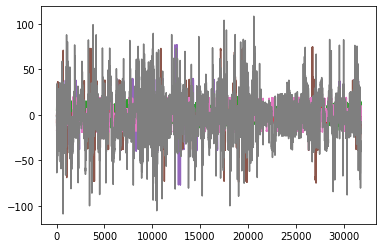

In [ ]:
#MV
X1 =HandleMV.values
diff1 = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X1)):
	value1 = X1[i] - X1[i - days_in_year]
	diff1.append(value1)
pyplot.plot(diff1)

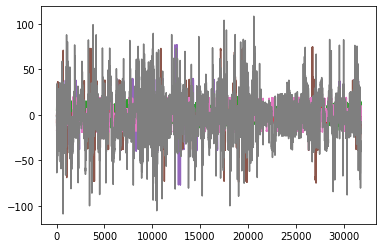

In [ ]:
#MVM
X2 =HandleMVM.values
diff2 = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X2)):
	value2 = X2[i] - X2[i - days_in_year]
	diff2.append(value2)
pyplot.plot(diff2)

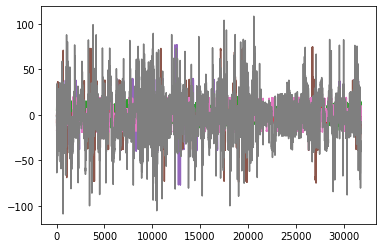

In [ ]:
#MVK
X3 =HandleMVK.values
diff3 = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X3)):
	value3 = X3[i] - X3[i - days_in_year]
	diff3.append(value3)
pyplot.plot(diff3)

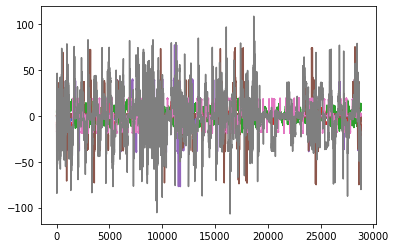

In [ ]:
#BASELINE
X4 =baselineImputation.values
diff4 = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X4)):
	value4 = X4[i] - X4[i - days_in_year]
	diff4.append(value4)
pyplot.plot(diff4)

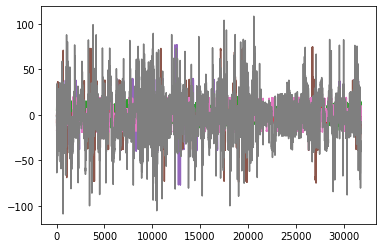

In [ ]:
#MV
Handle1 = HandleMV.copy(deep=True)
Handle1=diff1
pyplot.plot(Handle1)

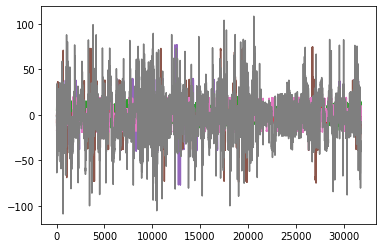

In [ ]:
#MVM
Handle2 = HandleMVM.copy(deep=True)
Handle2=diff2
pyplot.plot(Handle2)

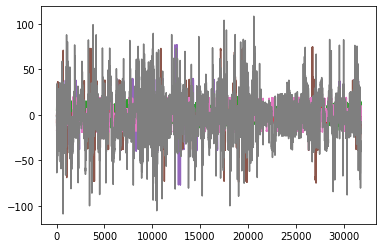

In [ ]:
#MVK
Handle3 = HandleMVK.copy(deep=True)
Handle3=diff3
pyplot.plot(Handle3)

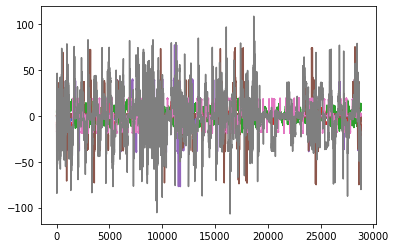

In [ ]:
#BASELINE
Handle4 =baselineImputation.copy(deep=True)
Handle4=diff4
pyplot.plot(Handle4)

In [ ]:
#MV
#Convert list back to dataframe
df2 = pd.DataFrame(Handle1) 
print(df2) 


#MVM
#Convert list back to dataframe
df3 = pd.DataFrame(Handle2) 
print(df2) 

#MVK
#Convert list back to dataframe
df4 = pd.DataFrame(Handle3) 
print(df2) 


#BASELINE
#Convert list back to dataframe
df5 = pd.DataFrame(Handle4) 
print(df2) 


           0      1         2     3    4         5          6          7
0     -1.782 -0.346  5.290000  -8.4  0.0 -1.000000 -17.000000 -11.700000
1     -2.858 -0.300  6.610000 -12.6  0.0 -1.000000 -16.000000 -30.633333
2     -2.856 -0.322  7.240000 -12.6  0.0 -2.000000 -17.000000 -28.600000
3     -3.872 -0.312  7.620000 -15.4  0.0 -1.000000 -17.000000 -46.533333
4     -2.168 -0.340  5.340000  -8.2  0.0 -1.000000 -17.000000 -18.133333
...      ...    ...       ...   ...  ...       ...        ...        ...
31823 -1.038 -0.252 -2.041081  -4.6  0.0  0.000000   0.000000 -17.300000
31824 -1.062 -0.348  4.890000  -4.6  0.0  0.000000   1.000000 -18.700000
31825 -1.094 -0.354  5.640000  -5.0  0.0  0.000000   0.000000 -18.233333
31826 -1.022 -0.294  5.020000  -4.4  0.0  0.000000   1.000000 -18.033333
31827 -0.944 -0.130  5.370000  -4.2  0.0  1.064046  -9.195087  -7.602292

[31828 rows x 8 columns]
           0      1         2     3    4         5          6          7
0     -1.782 -0.346  5.29

In [ ]:
# save to file
HandleMVM.to_csv('pol2MVM.csv')
HandleMV.to_csv('pol2MV.csv')
HandleMVK.to_csv('pol2MVK.csv')
#df2.to_csv('pollutionBK1.csv')

In [ ]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import sqrt 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
#MV 
# load updated dataset
dataset1 = read_csv('/content/pol2MV.csv', header=0, index_col=0)
values1 = dataset1.values
# integer encode direction
encoder1 = LabelEncoder()
values1[:,4] = encoder1.fit_transform(values1[:,4])
# ensure all data is float
values1 = values1.astype('float32')
# normalize features
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaled1 = scaler1.fit_transform(values1)
# frame as supervised learning
reframed1 = series_to_supervised(scaled1, 1, 1)
# drop columns we don't want to predict
reframed1.drop(reframed1.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
print(reframed1.head())
 
data1 = reframed1.values



#MVM
# load dataset
# load dataset
dataset2 = read_csv('/content/pol2MVM.csv', header=0, index_col=0)
values2 = dataset2.values
# integer encode direction
encoder2 = LabelEncoder()
values2[:,4] = encoder2.fit_transform(values2[:,4])
# ensure all data is float
values2 = values2.astype('float32')
# normalize features
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled2= scaler2.fit_transform(values2)
# frame as supervised learning
reframed2 = series_to_supervised(scaled2, 1, 1)
# drop columns we don't want to predict
reframed2.drop(reframed2.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
print(reframed2.head())
 
data2 = reframed2.values



#MVK
# load dataset
dataset3 = read_csv('/content/pol2MVK.csv', header=0, index_col=0)
values3 = dataset3.values
# integer encode direction
encoder3 = LabelEncoder()
values3[:,4] = encoder3.fit_transform(values3[:,4])
# ensure all data is float
values3 = values3.astype('float32')
# normalize features
scaler3 = MinMaxScaler(feature_range=(0, 1))
scaled3 = scaler3.fit_transform(values3)
# frame as supervised learning
reframed3 = series_to_supervised(scaled3, 1, 1)
# drop columns we don't want to predict
reframed3.drop(reframed3.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
print(reframed3.head())
 
data3 = reframed3.values


   var1(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.449989  0.577982  0.505800  0.288022  0.575130      0.0  0.013333   
2   0.577982  0.579548  0.577726  0.274626  0.575130      0.0  0.026667   
3   0.579548  0.581114  0.582367  0.292356  0.575130      0.0  0.013333   
4   0.581114  0.388454  0.612529  0.368794  0.388601      0.0  0.013333   
5   0.388454  0.372119  0.605568  0.342790  0.367876      0.0  0.026667   

   var7(t)   var8(t)  
1     0.80  0.761744  
2     0.85  0.753726  
3     0.85  0.759323  
4     0.85  0.629077  
5     0.85  0.613495  
   var1(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.449989  0.577982  0.505800  0.288022  0.575130      0.0  0.013333   
2   0.577982  0.579548  0.577726  0.274626  0.575130      0.0  0.026667   
3   0.579548  0.581114  0.582367  0.292356  0.575130      0.0  0.013333   
4   0.581114  0.388454  0.612529  0.368794  0.388601      0.0  0.013333   
5   0.388454  0.372119  0.605568  0.

In [ ]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    n_train_hours = 365 * 24
    # split between validation dataset,train and test set:
    train_data, val_data = train_test_split(data, train_size=0.70, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, test_size=0.15, shuffle=True, random_state=123)

    return train_data, val_data, test_data

In [ ]:
#MV
train_data1, val_data1, test_data1 = split_dataset(data1)
# split into input and outputs
train_X1, train_y1 = train_data1[:, :-1], train_data1[:, -1]
val_X1,val_y1=val_data1[:, :-1], val_data1[:, -1]
test_X1, test_y1 = test_data1[:, :-1], test_data1[:, -1]



#MVM
train_data2, val_data2, test_data2 = split_dataset(data2)
# split into input and outputs
train_X2, train_y2 = train_data2[:, :-1], train_data2[:, -1]
val_X2,val_y2=val_data2[:, :-1], val_data2[:, -1]
test_X2, test_y2 = test_data2[:, :-1], test_data2[:, -1]



#MVK
train_data3, val_data3, test_data3 = split_dataset(data3)
# split into input and outputs
train_X3, train_y3 = train_data3[:, :-1], train_data3[:, -1]
val_X3,val_y3=val_data3[:, :-1], val_data3[:, -1]
test_X3, test_y3 = test_data3[:, :-1], test_data3[:, -1]


In [ ]:
#MV
# reshape input to be 3D [samples, timesteps, features]
train_X1 = train_X1.reshape((train_X1.shape[0], 1, train_X1.shape[1]))
test_X1 = test_X1.reshape((test_X1.shape[0], 1, test_X1.shape[1]))
val_X1 = val_X1.reshape((val_X1.shape[0], 1, val_X1.shape[1]))


#MVM
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
val_X2 = val_X2.reshape((val_X2.shape[0], 1, val_X2.shape[1]))


#MVK
# reshape input to be 3D [samples, timesteps, features]
train_X3 = train_X3.reshape((train_X3.shape[0], 1, train_X3.shape[1]))
test_X3 = test_X3.reshape((test_X3.shape[0], 1, test_X3.shape[1]))
val_X3 = val_X3.reshape((val_X3.shape[0], 1, val_X3.shape[1]))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
313/313 - 7s - loss: 0.0723 - val_loss: 0.0114 - 7s/epoch - 22ms/step
Epoch 2/50
313/313 - 1s - loss: 0.0043 - val_loss: 0.0028 - 1s/epoch - 5ms/step
Epoch 3/50
313/313 - 1s - loss: 0.0024 - val_loss: 0.0019 - 1s/epoch - 4ms/step
Epoch 4/50
313/313 - 1s - loss: 0.0021 - val_loss: 0.0024 - 1s/epoch - 4ms/step
Epoch 5/50
313/313 - 1s - loss: 0.0018 - val_loss: 0.0015 - 1s/epoch - 4ms/step
Epoch 6/50
313/313 - 1s - loss: 0.0016 - v

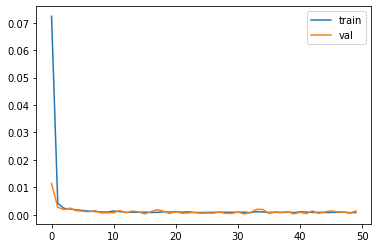

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                11800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
313/313 - 3s - loss: 0.0775 - val_loss: 0.0122 - 3s/epoch - 9ms/step
Epoch 2/50
313/313 - 1s - loss: 0.0043 - val_loss: 0.0025 - 1s/epoch - 3ms/step
Epoch 3/50
313/313 - 1s - loss: 0.0024 - val_loss: 0.0020 - 1s/epoch - 3ms/step
Epoch 4/50
313/313 - 1s - loss: 0.0020 - val_loss: 0.0022 - 1s/epoch - 4ms/step
Epoch 5/50
313/313 - 1s - loss: 0.0017 - val_loss: 0.0015 - 1s/epoch - 4ms/step
Epoch 6/50
313/313 - 1s - loss: 0.0015 - 

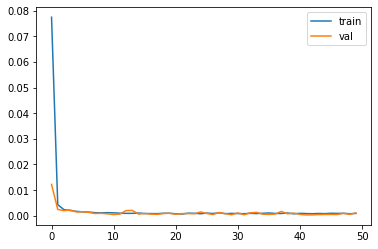

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11800     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
313/313 - 3s - loss: 0.0873 - val_loss: 0.0095 - 3s/epoch - 10ms/step
Epoch 2/50
313/313 - 1s - loss: 0.0034 - val_loss: 0.0023 - 1s/epoch - 4ms/step
Epoch 3/50
313/313 - 1s - loss: 0.0020 - val_loss: 0.0016 - 1s/epoch - 4ms/step
Epoch 4/50
313/313 - 1s - loss: 0.0017 - val_loss: 0.0012 - 1s/epoch - 4ms/step
Epoch 5/50
313/313 - 1s - loss: 0.0015 - val_loss: 0.0014 - 1s/epoch - 3ms/step
Epoch 6/50
313/313 - 1s - loss: 0.0014 -

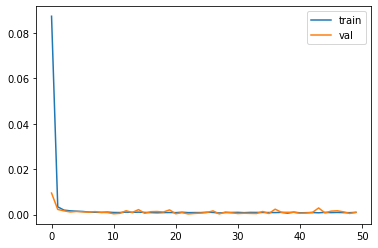

In [ ]:
#MV
import tensorflow  as tf
# design network
model1 = Sequential()
model1.add(LSTM(50, input_shape=(train_X1.shape[1], train_X1.shape[2])))
#model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model1.add(Dense(1))
optim1=tf.keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='mae', optimizer=optim1)
#model.compile(loss='mae', optimizer='adam')
print(model1.summary())
# fit network
#history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history1 = model1.fit(train_X1, train_y1, epochs=50, batch_size=72, validation_data=(val_X1,val_y1), verbose=2, shuffle=False)
# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()



#MVM
# design network
model2 = Sequential()
model2.add(LSTM(50, input_shape=(train_X2.shape[1], train_X2.shape[2])))
#model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model2.add(Dense(1))
optim2=tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss='mae', optimizer=optim2)
#model.compile(loss='mae', optimizer='adam')
print(model2.summary())
# fit network
#history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history2 = model2.fit(train_X2, train_y2, epochs=50, batch_size=72, validation_data=(val_X2,val_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()





#MVK
# design network
model3 = Sequential()
model3.add(LSTM(50, input_shape=(train_X3.shape[1], train_X3.shape[2])))
#model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model3.add(Dense(1))
optim3=tf.keras.optimizers.Adam(learning_rate=0.001)
model3.compile(loss='mae', optimizer=optim3)
#model.compile(loss='mae', optimizer='adam')
print(model3.summary())
# fit network
#history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
history3 = model3.fit(train_X3, train_y3, epochs=50, batch_size=72, validation_data=(val_X3,val_y3), verbose=2, shuffle=False)
# plot history
pyplot.plot(history3.history['loss'], label='train')
pyplot.plot(history3.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()


In [ ]:
#MV
# make a prediction
yhat1 = model1.predict(test_X1)
test_X1 = test_X1.reshape((test_X1.shape[0], test_X1.shape[2]))
# invert scaling for forecast
inv_yhat1 = concatenate((yhat1, test_X1[:, 1:]), axis=1)
inv_yhat1 = scaler1.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
# invert scaling for actual
test_y1 = test_y1.reshape((len(test_y1), 1))
inv_y1 = concatenate((test_y1, test_X1[:, 1:]), axis=1)
inv_y1 = scaler1.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]
# calculate RMSE
rmse1 = sqrt(mean_squared_error(inv_y1, inv_yhat1))
print('Test RMSE: %.3f' % rmse1)




#MVM
# make a prediction
yhat2 = model2.predict(test_X2)
test_X2 = test_X2.reshape((test_X2.shape[0], test_X2.shape[2]))
# invert scaling for forecast
inv_yhat2 = concatenate((yhat2, test_X2[:, 1:]), axis=1)
inv_yhat2 = scaler2.inverse_transform(inv_yhat2)
inv_yhat2 = inv_yhat2[:,0]
# invert scaling for actual
test_y2 = test_y2.reshape((len(test_y2), 1))
inv_y2 = concatenate((test_y2, test_X2[:, 1:]), axis=1)
inv_y2 = scaler2.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]
# calculate RMSE
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.3f' % rmse2)



#MVK
# make a prediction
yhat3 = model3.predict(test_X3)
test_X3 = test_X3.reshape((test_X3.shape[0], test_X3.shape[2]))
# invert scaling for forecast
inv_yhat3 = concatenate((yhat3, test_X3[:, 1:]), axis=1)
inv_yhat3 = scaler3.inverse_transform(inv_yhat3)
inv_yhat3 = inv_yhat3[:,0]
# invert scaling for actual
test_y3 = test_y3.reshape((len(test_y3), 1))
inv_y3 = concatenate((test_y3, test_X3[:, 1:]), axis=1)
inv_y3 = scaler3.inverse_transform(inv_y3)
inv_y3 = inv_y3[:,0]
# calculate RMSE
rmse3 = sqrt(mean_squared_error(inv_y3, inv_yhat3))
print('Test RMSE: %.3f' % rmse3)



46/46 [==============================] - 0s 2ms/step
Test RMSE: 0.018
46/46 [==============================] - 0s 2ms/step
Test RMSE: 0.016
46/46 [==============================] - 0s 2ms/step
Test RMSE: 0.014


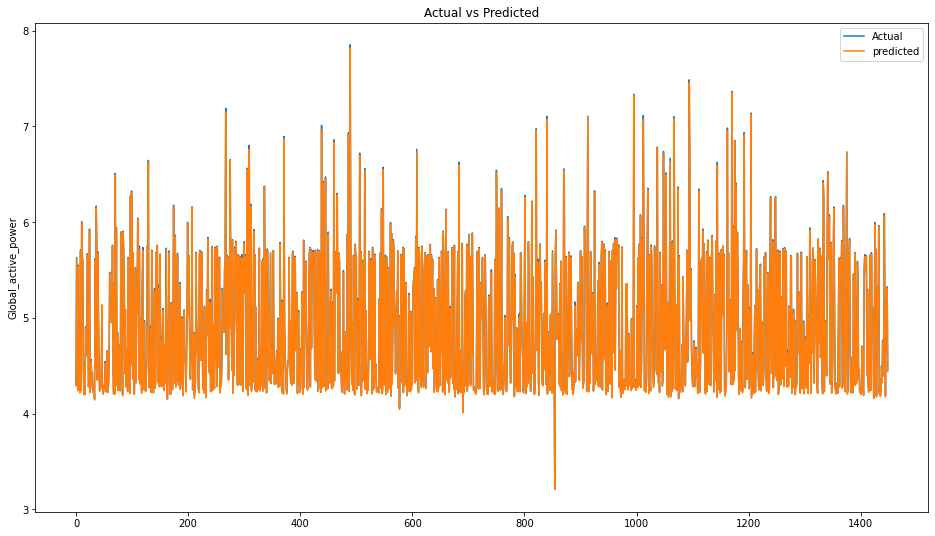

In [ ]:
#MV
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot( list(inv_y1))
#plt.plot( list(validate['Global_active_power']))
plt.plot( list(inv_yhat1))
plt.title("Actual vs Predicted")
plt.ylabel("Global_active_power")
plt.legend(('Actual','predicted'))
plt.show()




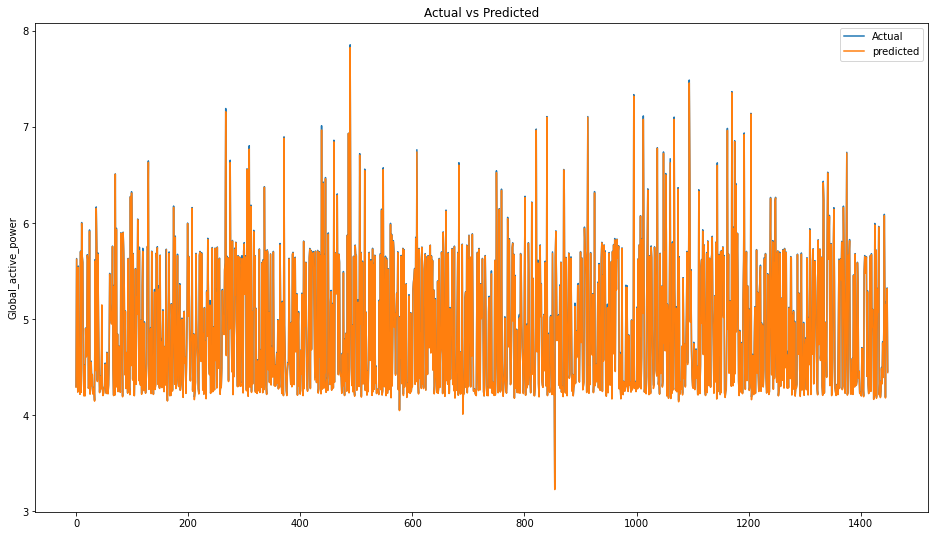

In [ ]:
#MVM
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot( list(inv_y2))
#plt.plot( list(validate['Global_active_power']))
plt.plot( list(inv_yhat2))
plt.title("Actual vs Predicted")
plt.ylabel("Global_active_power")
plt.legend(('Actual','predicted'))
plt.show()


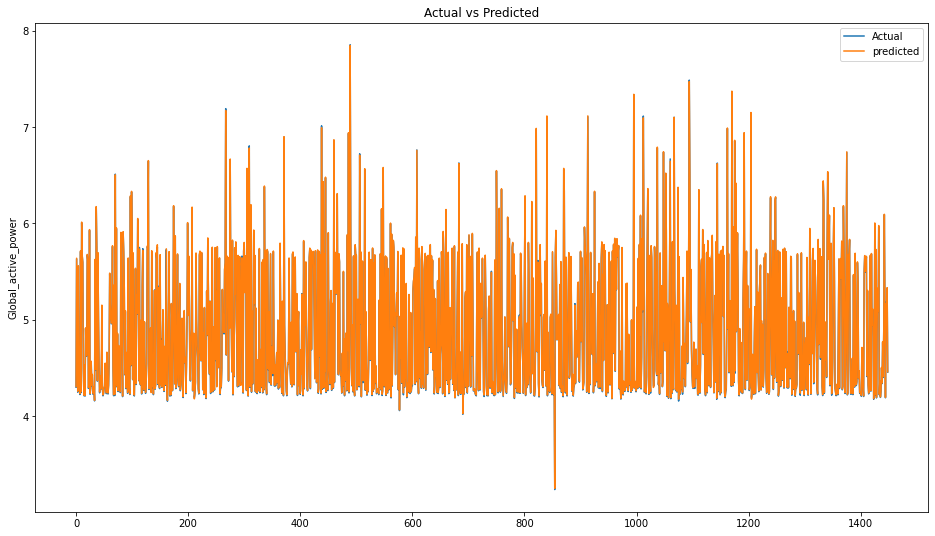

In [ ]:
#MVK
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot( list(inv_y3))
#plt.plot( list(validate['Global_active_power']))
plt.plot( list(inv_yhat3))
plt.title("Actual vs Predicted")
plt.ylabel("Global_active_power")
plt.legend(('Actual','predicted'))
plt.show()

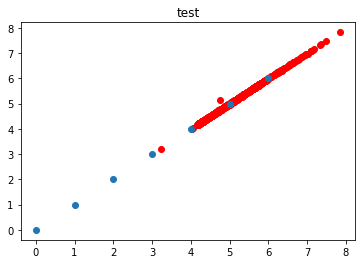

In [ ]:
#Method 1
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(list(inv_y1) ,list(inv_yhat1),"test")

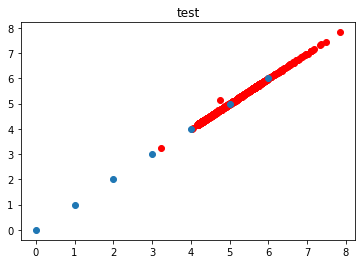

In [ ]:
plotGraph(list(inv_y2) ,list(inv_yhat2),"test")

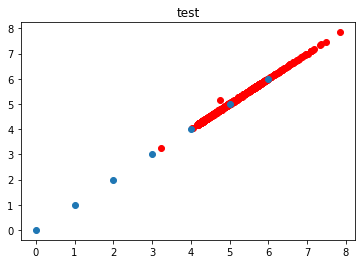

In [ ]:
plotGraph(list(inv_y3) ,list(inv_yhat3),"test")

Text(0.5, 1.0, 'Actual vs Predicted Values for MV')

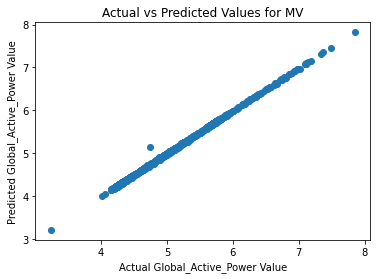

In [ ]:
#Method 2
plt.scatter(list(inv_y1), list(inv_yhat1))
plt.xlabel("Actual Global_Active_Power Value")
plt.ylabel("Predicted Global_Active_Power Value")
plt.title("Actual vs Predicted Values for MV")


Text(0.5, 1.0, 'Actual vs Predicted Values for MVM')

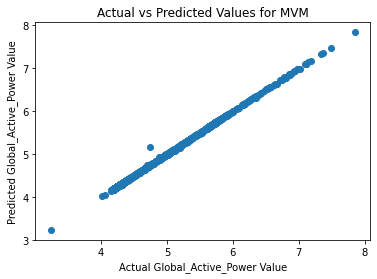

In [ ]:
#MVM
#Method 2
plt.scatter(list(inv_y2), list(inv_yhat2))
plt.xlabel("Actual Global_Active_Power Value")
plt.ylabel("Predicted Global_Active_Power Value")
plt.title("Actual vs Predicted Values for MVM")


Text(0.5, 1.0, 'Actual vs Predicted Values ')

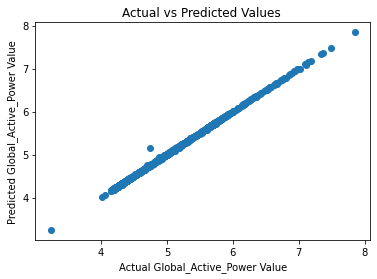

In [ ]:
#MVK
#Method 2
plt.scatter(list(inv_y3), list(inv_yhat3))
plt.xlabel("Actual Global_Active_Power Value")
plt.ylabel("Predicted Global_Active_Power Value")
plt.title("Actual vs Predicted Values ")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')

In [ ]:
import sklearn.metrics as metrics
import numpy as np
print("MV")
timeseries_evaluation_metrics_func(inv_y1,inv_yhat1)

MV
Evaluation metric results:-
MSE is : 0.00030952508677728474
MAE is : 0.012664326466619968
RMSE is : 0.017593324184417725
MAPE is : 0.2584788016974926


In [ ]:
print("MVm")
timeseries_evaluation_metrics_func(inv_y2,inv_yhat2)

MVm
Evaluation metric results:-
MSE is : 0.00024381911498494446
MAE is : 0.009660198353230953
RMSE is : 0.015614707954227924
MAPE is : 0.19621767569333315


In [ ]:
print("MVk")
timeseries_evaluation_metrics_func(inv_y3,inv_yhat3)

MVk
Evaluation metric results:-
MSE is : 0.00020420333021320403
MAE is : 0.008626637980341911
RMSE is : 0.014289973303675652
MAPE is : 0.18019506242126226
